<a href="https://colab.research.google.com/github/Untick/insects_detection/blob/main/Svetozarov%20Andrey/Y8_%D0%BB%D0%B8%D1%81%D1%82%D1%8C%D1%8F%2C_%D0%BE%D0%B1%D1%8A%D0%B5%D0%B4%D0%B8%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BA%D0%B2%D0%B0%D0%B4%D1%80%D0%B0%D1%82%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Mounted at /content/drive


In [ ]:
!pip install wget
import wget


  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=95c8243dfbf9e23ce42d3d0b68c86980e39b6ed87e502b2818cb22984f4fee29
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 618.9/618.9 kB 10.1 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8x.pt")  # большая модель



100%|██████████| 131M/131M [00:00<00:00, 149MB/s]


In [ ]:
# Train the model
results = model.train(data="/content/drive/MyDrive/Учебные БД/leavs/data.yaml", imgsz=800, batch=8, epochs=100, plots=True)

Ultralytics YOLOv8.0.194 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/content/drive/MyDrive/Учебные БД/leavs/data.yaml, epochs=100, patience=50, batch=8, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscr

In [ ]:
 model.val(conf=0.5)
 # or you can set the data you want to val
 model.val(data="/content/drive/MyDrive/Учебные БД/leavs/data.yaml", conf=0.5)

Ultralytics YOLOv8.0.194 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68124531 parameters, 0 gradients, 257.4 GFLOPs
val: Scanning /content/drive/MyDrive/Учебные БД/leavs/valid/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.00s/it]
                   all         20        135      0.833      0.556       0.72      0.548
Speed: 7.7ms preprocess, 71.0ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/val
Ultralytics YOLOv8.0.194 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
val: Scanning /content/drive/MyDrive/Учебные БД/leavs/valid/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x799983a1dde0>
fitness: 0.5649786351644219
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([     0.5478])
names: {0: 'bad'}
plot: True
results_dict: {'metrics/precision(B)': 0.8333333333333334, 'metrics/recall(B)': 0.5555555555555556, 'metrics/mAP50(B)': 0.719605109295395, 'metrics/mAP50-95(B)': 0.547797915816536, 'fitness': 0.5649786351644219}
save_dir: PosixPath('runs/detect/val2')
speed: {'preprocess': 4.692435264587402, 'inference': 63.286292552948, 'loss': 0.002467632293701172, 'postprocess': 3.9936661720275883}

In [ ]:
from IPython.display import Image


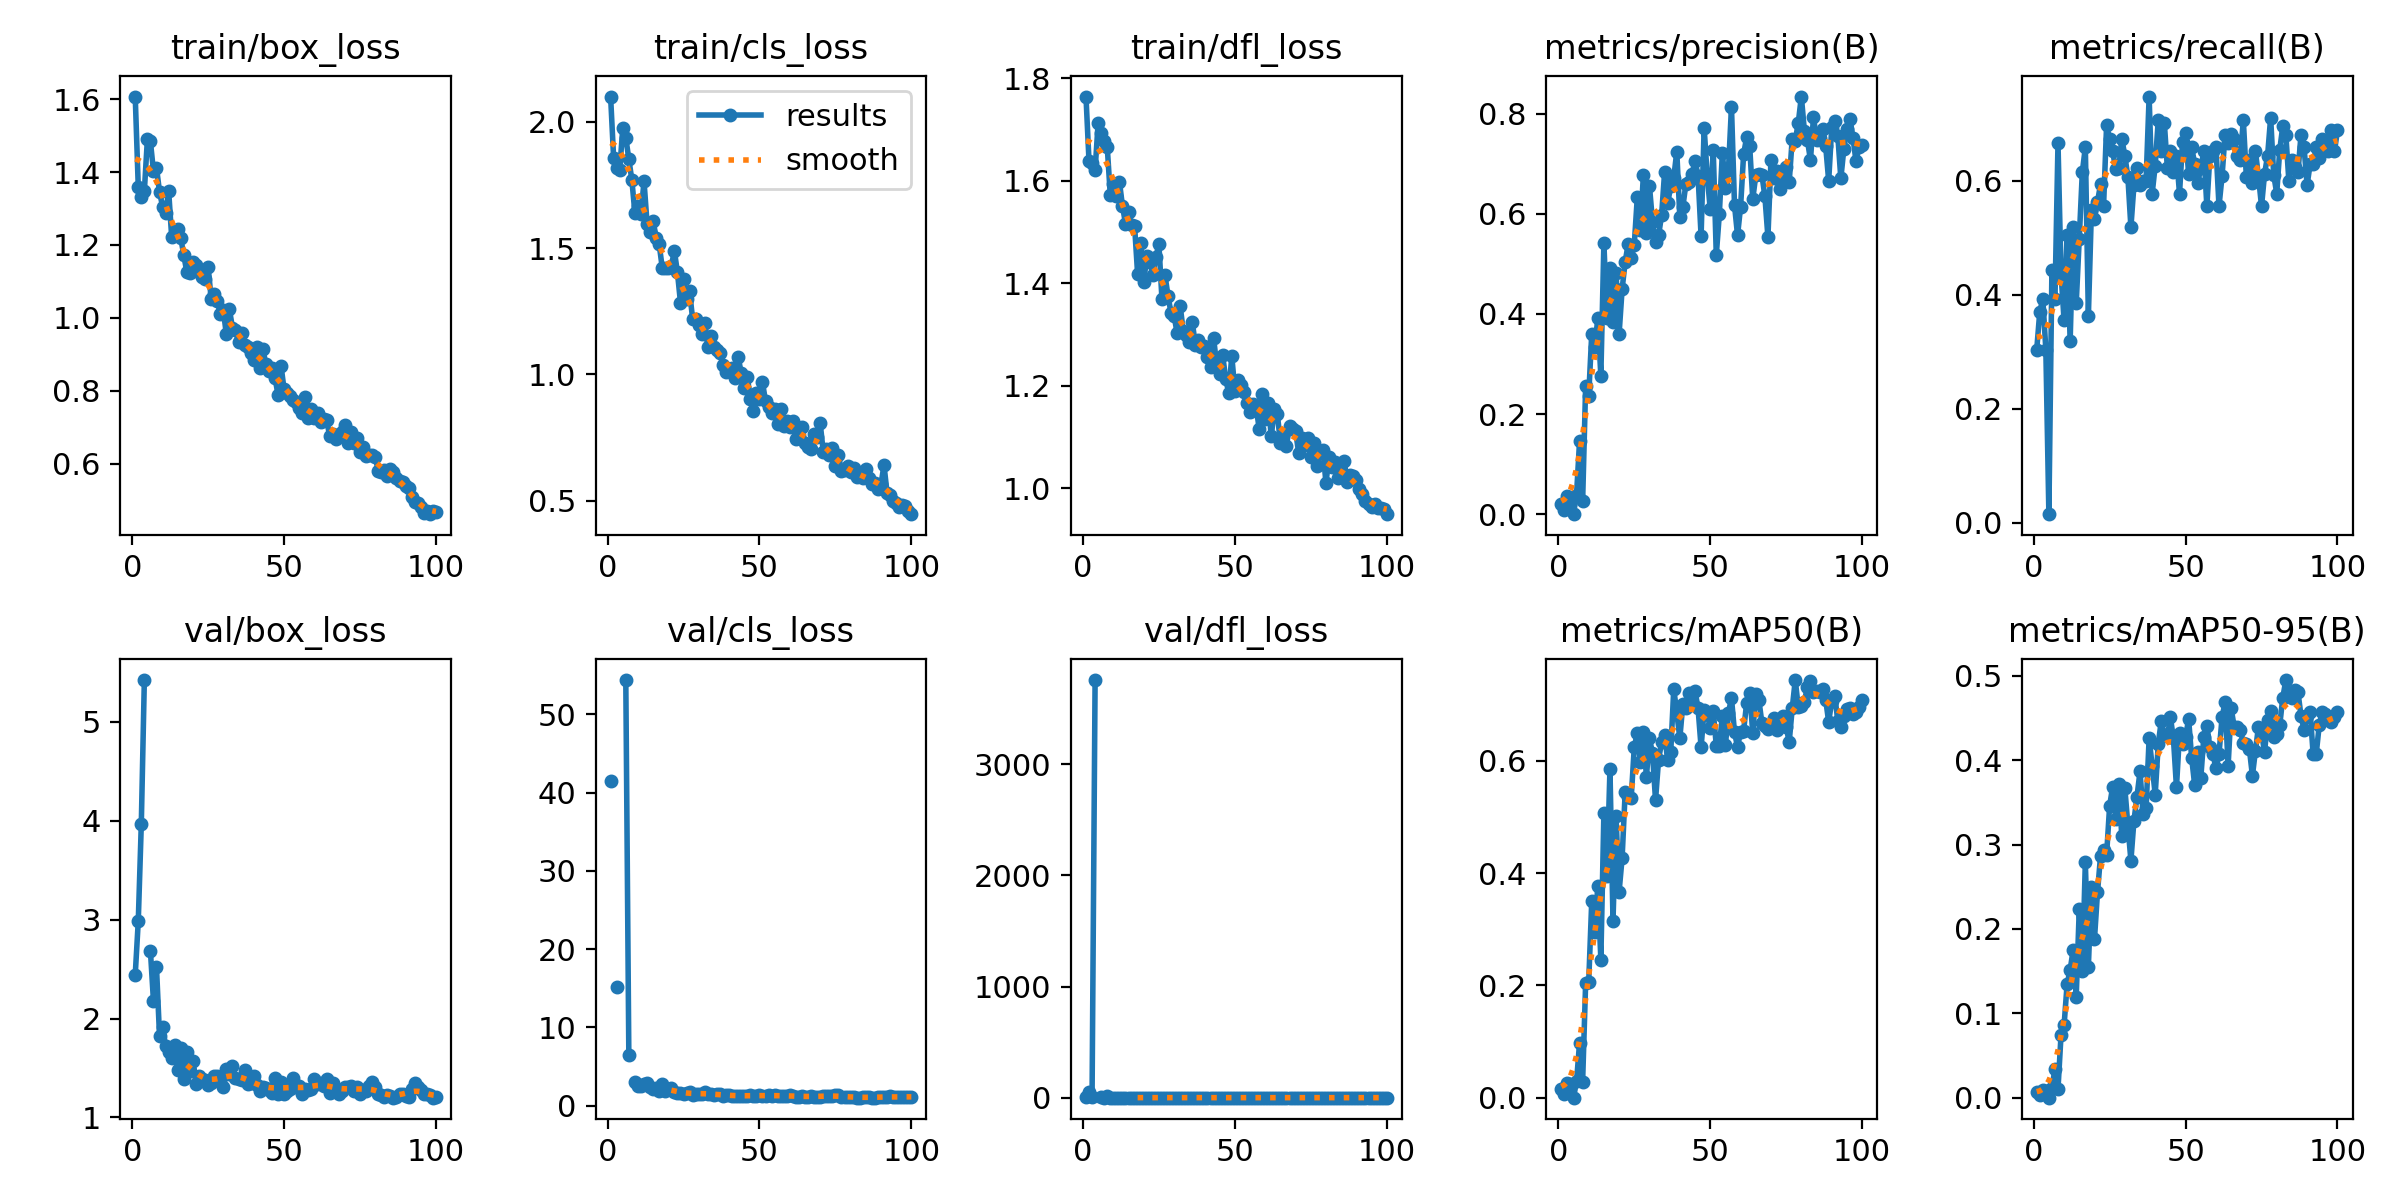

In [ ]:
Image(filename='/content/runs/detect/train3/results.png', height=600)

In [ ]:
model = YOLO("./runs/detect/train3/weights/best.pt")

FileNotFoundError: ignored

In [ ]:
#сохранение весов, чтобы не учить после перезагрузки колаба:

from google.colab import drive
drive.mount('/content/drive')

import shutil

# Путь к исходному файлу
source_path = '/content/runs/detect/train3/weights/best.pt'

# Путь к целевой папке на Google Диске
target_path = '/content/drive/MyDrive/Учебные БД/leavs/'

# Копирование файла на Google Диск
shutil.copy(source_path, target_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content/drive/MyDrive/Учебные БД/leavs/best.pt'

In [ ]:
# если уже есть сохраненные веса, то загружаем их из папки сохранения:
model = YOLO("/content/drive/MyDrive/Учебные БД/leavs/best.pt")

Далее выгружаем разметку листьев, которую детектировала сетка, в txt-файлы. Ставим save_txt=True. Разметка каждого кадра сохраняется в отдельный txt.


In [ ]:
model.predict(source="/content/drive/MyDrive/Учебные БД/data_2/CUT.mp4", save_txt=True, show=True)

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (1/810) /content/drive/MyDrive/Учебные БД/data_2/CUT.mp4: 480x800 8 bads, 75.9ms
video 1/1 (2/810) /content/drive/MyDrive/Учебные БД/data_2/CUT.mp4: 480x800 9 bads, 58.4ms
video 1/1 (3/810) /content/drive/MyDrive/Учебные БД/data_2/CUT.mp4: 480x800 9 bads, 57.9ms
video 1/1 (4/810) /content/drive/MyDrive/Учебные БД/data_2/CUT.mp4: 480x800 9 bads, 49.2ms
video 1/1 (5/810) 

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'bad'}
 orig_img: array([[[ 61,  47,  40],
         [ 61,  47,  40],
         [ 61,  47,  40],
         ...,
         [ 28,  64,  59],
         [ 58,  97,  91],
         [ 74, 113, 107]],
 
        [[ 61,  47,  40],
         [ 61,  47,  40],
         [ 61,  47,  40],
         ...,
         [ 38,  74,  69],
         [ 71, 110, 104],
         [ 82, 121, 115]],
 
        [[ 61,  47,  40],
         [ 61,  47,  40],
         [ 61,  47,  40],
         ...,
         [ 57,  81,  84],
         [ 90, 119, 121],
         [ 99, 128, 130]],
 
        ...,
 
        [[ 77,  68,  52],
         [ 77,  68,  52],
         [ 77,  68,  52],
         ...,
         [ 43,  54,  43],
         [ 43,  54,  43],
         [ 41,  52,  41]],
 
        [[ 74,  68,  56],
         [ 74,  68,  56],
         [ 74,  68,  56],
         ...,
         [ 45,  53,  43],
      

In [ ]:
#перепишим все текстовики в гуглдиск (чтобы при перезагрузке колаба не потерять данные)
import os
import shutil

source_folder = '/content/runs/detect/predict/labels'
destination_folder = '/content/drive/MyDrive/Учебные БД/leavs/txt_labels_cut'

os.makedirs(destination_folder, exist_ok=True)

for file_name in os.listdir(source_folder):
    source = os.path.join(source_folder, file_name)
    destination = os.path.join(destination_folder, file_name)
    shutil.copy2(source, destination)



### Далее обрабатываем каждый текстовик, определяем пересекающиеся рамки, формируем единую рамку вокруг найденных кластеров рамок, добавляем веса (сколько рабок внутри кластера), наносим веса с финальными рамками на каждый кадр исходного видео, записываем каждый кадр в папку

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
import numpy as np
from skimage.measure import label, regionprops

# Функция объединения пересекающихся рамок
def merge_overlapping_boxes(boxes, frame):
    if not boxes:
        return []

    # Конвертировать координаты в формат (x1, y1, x2, y2)
    boxes = [(int((x - w / 2) * frame.shape[1]), int((y - h / 2) * frame.shape[0]),
              int((x + w / 2) * frame.shape[1]), int((y + h / 2) * frame.shape[0])) for x, y, w, h in boxes]

    # Инициализировать объединенные рамки
    merged_boxes = [list(boxes[0])]

    for box in boxes[1:]:
        # Пройтись по всем объединенным рамкам и проверить пересечение
        overlapping = False
        for i, merged_box in enumerate(merged_boxes):
            x1, y1, x2, y2 = merged_box
            x1_new, y1_new, x2_new, y2_new = box
            # Если рамки пересекаются, объединить их
            if (x1_new < x2 and x2_new > x1 and y1_new < y2 and y2_new > y1):
                merged_boxes[i] = [min(x1, x1_new), min(y1, y1_new), max(x2, x2_new), max(y2, y2_new)]
                overlapping = True
                break
        # Если рамка не пересекается ни с одной из объединенных рамок, добавить ее как новую
        if not overlapping:
            merged_boxes.append(list(box))

    return merged_boxes

def process_frame(input_video_path, frame_number, output_folder):
    # Чтение кадра из видео
    cap = cv2.VideoCapture(input_video_path)
    cap.set(1, frame_number)
    ret, frame = cap.read()
    cap.release()

    # Чтение координат прямоугольников
    txt_file_path = f'/content/drive/MyDrive/Учебные БД/leavs/txt_labels_cut/CUT_{frame_number+1}.txt'
    with open(txt_file_path, 'r') as file:
        lines = file.readlines()
    boxes = [list(map(float, line.split()[1:])) for line in lines]

    # Объединение пересекающихся рамок
    merged_boxes = merge_overlapping_boxes(boxes, frame)

    # Преобразование кадра в маску
    mask = np.zeros(frame.shape[:2], dtype=np.uint8)
    for box in merged_boxes:
        top_left = (box[0], box[1])
        bottom_right = (box[2], box[3])
        cv2.rectangle(mask, top_left, bottom_right, (255, 255, 255), -1)

    # Находим контуры объектов на маске
    labels = label(mask)
    box_count = {}

    for region in regionprops(labels):
        if region.area >= 1:
            minr, minc, maxr, maxc = region.bbox
            label_value = labels[minr, minc]
            if label_value not in box_count:
                box_count[label_value] = 0

            for box in boxes:
                x, y, _, _ = box
                x_center = int(x * frame.shape[1])
                y_center = int(y * frame.shape[0])

                # Проверяем, находится ли центр координат внутри текущей итоговой рамки
                if minc <= x_center <= maxc and minr <= y_center <= maxr:
                    box_count[label_value] += 1

            top_left = (minc, minr)
            bottom_right = (maxc, maxr)

            box_count_string = str(box_count[label_value])
            # Рассчитываем размер текста
            (w, h), _ = cv2.getTextSize(box_count_string, cv2.FONT_HERSHEY_SIMPLEX, 0.9, 2)
            # Рассчитываем отступы слева и справа
            left_padding = 10
            right_padding = 20  # Увеличиваем правый отступ
            # Рассчитываем новые координаты белой заливки
            new_minr = minr + h + 5
            new_maxc = minc + w + left_padding + right_padding
            # Рисуем белую заливку с отступами слева и справа и смещаем подпись вправо
            cv2.rectangle(frame, (minc, minr), (new_maxc, new_minr), (255, 255, 255), -1)
            cv2.putText(frame, box_count_string, (minc + left_padding, minr + h + 5), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
            cv2.rectangle(frame, top_left, bottom_right, (0, 255, 0), 2)

    # Сохраняем итоговый кадр
    output_image_path = f'{output_folder}/frame_{frame_number}.jpg'
    cv2.imwrite(output_image_path, frame)
    return output_image_path

# Путь к видеофайлу и папке для сохранения изображений
video_path = '/content/drive/MyDrive/Учебные БД/data_2/CUT.mp4'
output_folder = '/content/drive/MyDrive/Учебные БД/leavs/frames'

# Получение количества кадров в видео
cap = cv2.VideoCapture(video_path)
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
cap.release()

# Обработка каждого кадра и сохранение изображений
for frame_number in range(frame_count):
    output_image_path = process_frame(video_path, frame_number, output_folder)
    print(f'Processed frame {frame_number + 1}/{frame_count}: {output_image_path}')


Processed frame 1/810: /content/drive/MyDrive/Учебные БД/leavs/frames/frame_0.jpg
Processed frame 2/810: /content/drive/MyDrive/Учебные БД/leavs/frames/frame_1.jpg
Processed frame 3/810: /content/drive/MyDrive/Учебные БД/leavs/frames/frame_2.jpg
Processed frame 4/810: /content/drive/MyDrive/Учебные БД/leavs/frames/frame_3.jpg
Processed frame 5/810: /content/drive/MyDrive/Учебные БД/leavs/frames/frame_4.jpg
Processed frame 6/810: /content/drive/MyDrive/Учебные БД/leavs/frames/frame_5.jpg
Processed frame 7/810: /content/drive/MyDrive/Учебные БД/leavs/frames/frame_6.jpg
Processed frame 8/810: /content/drive/MyDrive/Учебные БД/leavs/frames/frame_7.jpg
Processed frame 9/810: /content/drive/MyDrive/Учебные БД/leavs/frames/frame_8.jpg
Processed frame 10/810: /content/drive/MyDrive/Учебные БД/leavs/frames/frame_9.jpg
Processed frame 11/810: /content/drive/MyDrive/Учебные БД/leavs/frames/frame_10.jpg
Processed frame 12/810: /content/drive/MyDrive/Учебные БД/leavs/frames/frame_11.jpg
Processed f

### Из последовательности картинок формируем видеофайл

In [ ]:
import cv2
import os

# Путь к папке с изображениями
image_folder = '/content/drive/MyDrive/Учебные БД/leavs/frames'

# Получение списка файлов изображений в папке
images = [img for img in os.listdir(image_folder) if img.endswith(".jpg")]

# Сортировка изображений по имени файла
images.sort(key=lambda x: int(x.split("_")[1].split(".")[0]))

# Определение первого изображения для получения его разрешения
frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape

# Путь к выходному видеофайлу
video_name = '/content/drive/MyDrive/Учебные БД/leavs/0video.mp4'
out = cv2.VideoWriter(video_name, cv2.VideoWriter_fourcc(*'mp4v'), 30, (width, height))

for image in images:
    img_path = os.path.join(image_folder, image)
    frame = cv2.imread(img_path)
    out.write(frame)

out.release()

print(f'Видео сохранено как {video_name}')


Видео сохранено как /content/drive/MyDrive/Учебные БД/leavs/0video.mp4
